# Notebook for areal and volume extent calculation and compilation for the BRD and GSF

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%matplotlib inline 
%config InlineBackend.figure_format='retina'

## plot the estimated volume of the GSF in context of Bryan (2010) compilation

Although Bryan et al., (2010) estimate that the Mahabaleshwar–Rajahmundry Traps has a volume of 9300 km$^3$, Self et al., (2008), the paper that Bryan et al., (2010) cites for this estimate gives a rather broad range for the volume of this traps (2000 - 9000 km$^3$). We decide to use a conservative volume estimate of 5000 km$^3$ for the Mahabaleshwar–Rajahmundry Traps suggested by Self et al., (2008). 

- Bryan, S. E., Peate, I. U., Peate, D. W., Self, S., Jerram, D. A., Mawby, M. R., ... & Miller, J. A. (2010). The largest volcanic eruptions on Earth. Earth-Science Reviews, 102(3-4), 207-229.
- Self, S., Jay, A. E., Widdowson, M., & Keszthelyi, L. P. (2008). Correlation of the Deccan and Rajahmundry Trap lavas: Are these the longest and largest lava flows on Earth?. Journal of Volcanology and Geothermal Research, 172(1-2), 3-19.

In [3]:
Bryan2010_compilation = pd.read_csv('../data/GIS/Largest_lava_compilation.csv')
Bryan2010_compilation = Bryan2010_compilation.sort_values(by='Minimum Eruptive Volume (km3)', ignore_index=True, ascending=False)
Bryan2010_compilation = Bryan2010_compilation.loc[:10]
Bryan2010_compilation.head()

,Eruptive Unit,Lava Flow Name,LIP,Eruptive Age (Ma),Minimum Eruptive Volume (km3),Lithology and Thickness,Magnitude,Composition (wt.% SiO2),References,Color
0,Mahabaleshwar–Rajahmundry Traps (Upper),M-R Traps,Deccan,64.8,5000,Basalt lava (20–50),9.40,High-Ti tholeiitic Basalt (48.1),Self et al. (2008),C1
1,"McCoy Canyon flow (Sentinel Bluffs Member, Gra...",McCoy Canyon flow,Columbia River,15.6,4078,Basalt lava (10–60),9.06,Tholeiitic Basalt (53.6),Reidel (2005); Landon and Long (1989),C0
2,Umtanum flow (Grande Ronde N2),Umtanum flow,Columbia River,15.6,2750,Basalt lava (~ 50),8.87,Tholeiitic Basalt (54.7),Reidel et al. (1989),C0
3,"Sand Hollow flow (Frenchmans Springs member, W...",Sand Hollow flow,Columbia River,15.3,2660,Basalt lava (~ 40),8.86,Tholeiitic Basalt (51.8),Beeson et al. (1985) Tolan et al. (1989),C0
4,"Pruitt Draw flow (Teepee Butte Member, Grande ...",Pruitt Draw flow,Columbia River,16.5,2350,Basalt Lava (30–100),8.80,Tholeiitic Basalt (53.0),Reidel and Tolan (1992); Reidel (1983),C0


In [4]:
Bryan2010_compilation.columns

Index(['Eruptive Unit', 'Lava Flow Name', 'LIP', 'Eruptive Age (Ma)',
       'Minimum Eruptive Volume (km3)', 'Lithology and Thickness', 'Magnitude',
       'Composition (wt.% SiO2)', 'References', 'Color'],
      dtype='object')

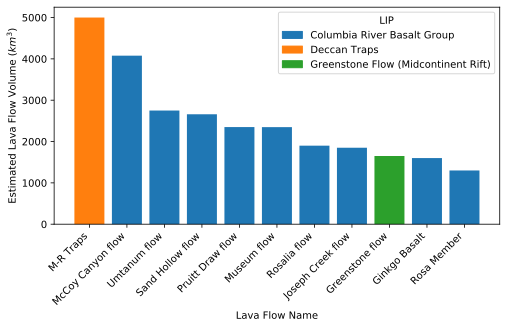

In [5]:
fig, ax = plt.subplots(figsize=(8,4))
ax.bar(x=Bryan2010_compilation['Lava Flow Name'], height=Bryan2010_compilation['Minimum Eruptive Volume (km3)'], color = Bryan2010_compilation['Color'])

# ax = sns.barplot(x='Lava Flow Name', y='Minimum Eruptive Volume (km3)', hue='LIP',  palette = ['C0', 'C2', 'C1'], data=Bryan2010_compilation)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Lava Flow Name')
plt.ylabel('Estimated Lava Flow Volume ($km^3$)')
C0_patch = mpatches.Patch(color='C0', label='Columbia River Basalt Group')
C1_patch = mpatches.Patch(color='C1', label='Deccan Traps')
C2_patch = mpatches.Patch(color='C2', label='Greenstone Flow (Midcontinent Rift)')
plt.legend(handles=[C0_patch, C1_patch, C2_patch], title='LIP')
plt.savefig('code_output/Lava_flow_rank.pdf', bbox_inches='tight')
plt.show()

## calculate the total area and volume of the BBC

In [8]:
BBC_polygons = pd.read_excel('../data/GIS/BBC_area_calc.xlsx', engine='openpyxl')
BBC_polygons.head()

,wkt_geom,AREA,PERIMETER,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,UTME,UTMN,UTM_ZONE,MAPLABEL,DESCRIPTN,UNIT_NAME,TERRANE,ERA,SUBDIV,area
0,MultiPolygon (((682376.61237743694800884 52885...,3.295540e+07,150332.403377,BG,AB,MGS,20101215,671075,5285359,15,Mbd,"Diabase, ferrodiorite",Beaver River diabase,"Beaver Bay Complex, other intrusions",Mesoproterozoic,Midcontinent Rift Intrusive Supersuite,3.295877e+07
1,MultiPolygon (((675838.23906702187377959 52838...,4.905721e+05,3276.146794,BG,AB,MGS,20101215,675259,5283730,15,Mbd,"Diabase, ferrodiorite",Beaver River diabase,"Beaver Bay Complex, other intrusions",Mesoproterozoic,Midcontinent Rift Intrusive Supersuite,4.905914e+05
2,MultiPolygon (((666473.22997318615671247 52836...,3.551048e+05,3018.732097,BG,AB,MGS,20101215,666163,5284121,15,Mbd,"Diabase, ferrodiorite",Beaver River diabase,"Beaver Bay Complex, other intrusions",Mesoproterozoic,Midcontinent Rift Intrusive Supersuite,3.551476e+05
3,MultiPolygon (((674047.14085028087720275 52833...,3.161627e+07,64957.046891,BG,AB,MGS,20101215,666504,5281437,15,Mbd,"Diabase, ferrodiorite",Beaver River diabase,"Beaver Bay Complex, other intrusions",Mesoproterozoic,Midcontinent Rift Intrusive Supersuite,3.162012e+07
4,MultiPolygon (((674061.04481395927723497 52833...,1.113994e+05,1468.521960,BG,AB,MGS,20101215,674055,5283105,15,Mbd,"Diabase, ferrodiorite",Beaver River diabase,"Beaver Bay Complex, other intrusions",Mesoproterozoic,Midcontinent Rift Intrusive Supersuite,1.114055e+05


In [9]:
BBC_area_km = BBC_polygons['area'].sum()/1000000
print('Beaver Bay Complex total mapped area is:', round(BBC_area_km,1), 'km^2')

Beaver Bay Complex total mapped area is: 1036.2 km^2


## calculate the total area and volume of the BRD

In [10]:
gemgeou = pd.read_csv('../data/GIS/gemgeou.csv')
BRD_polygons = gemgeou[(gemgeou['MAPLABEL'] == 'brd') | (gemgeou['MAPLABEL'] == 'brod')]
BRD_polygons.head()

,AREA,PERIMETER,GEMGEOU_,GEMGEOU_ID,RELATEID,TYPE,GCM_CODE,GEOC_SRC,GEOC_DATE,UTME,...,INTRP_DATE,BASIS1,BASIS2,MGSCODE,SYMBOL,MAPLABEL,UNIT_CODE,DESCRIPTN,REFRNCE,area_1
94,0.0,0.0,0,0,NaN,GU,AS,MGS,20000630,634050.0,...,19890000,OBS,OBI,0.0,0.0,brod,bbr,Beaver River - oph ol gabbro,NaN,77104.524
96,0.0,0.0,0,0,NaN,GU,AS,MGS,20000630,635571.0,...,19890000,OBS,OBI,0.0,0.0,brod,bbr,Beaver River - oph ol gabbro,NaN,57864.723
97,0.0,0.0,0,0,NaN,GU,AS,MGS,20000630,634426.0,...,19890000,OBI,TOP,0.0,0.0,brod,bbr,Beaver River - oph ol gabbro,NaN,4201.317
98,0.0,0.0,0,0,NaN,GU,AS,MGS,20000630,634000.0,...,19890000,OBI,TOP,0.0,0.0,brod,bbr,Beaver River - oph ol gabbro,NaN,79209.745
99,0.0,0.0,0,0,NaN,GU,AS,MGS,20000630,633542.0,...,19890000,OBI,TOP,0.0,0.0,brod,bbr,Beaver River - oph ol gabbro,NaN,133503.789


In [11]:
BRD_area_km = BRD_polygons['area_1'].sum()/1000000
print('Beaver River diabase total mapped area is:', round(BRD_area_km,1), 'km^2')

Beaver River diabase total mapped area is: 142.6 km^2


## calculate the total area and volume of the GSF

- The measured apparent thickness of the GSF on Isle Royale is 0.7 km
- The measured apparent thickness of the GSF on Keweenaw Peninsula is 1 km

- The dip angle of the GSF on Isle Royale is about 15 degrees

- The dip angle of the GSF on Keweenaw Peninsul is about 25 degrees

- the distance between Isle Royale and Keweenaw Peninsula is about 80 km.

In [38]:
GSF_Isle_Royale_polygons = pd.read_excel('../data/GIS/GSF_Isle_Royale_area.xlsx', engine='openpyxl')
GSF_Keweenaw_polygons = pd.read_excel('../data/GIS/GSF_Keweenaw_area.xlsx', engine='openpyxl')

In [39]:
GSF_Isle_Royale_area = round(GSF_Isle_Royale_polygons['AREA'].sum()/1000000, 2)
GSF_Keweenaw_area = round(GSF_Keweenaw_polygons['AREA'].sum()/1000000, 2)

In [40]:
print('Isle Royale GSF total area is:', GSF_Isle_Royale_area, 'km^2')
print('Keweenaw GSF total area is:', GSF_Keweenaw_area, 'km^2')

Isle Royale GSF total area is: 33.95 km^2
Keweenaw GSF total area is: 70.09 km^2


In [41]:
# GSF_thickness_IR = round(0.7*np.sin(15/180*np.pi), 2)
# GSF_thickness_Kewee = round(1*np.sin(25/180*np.pi), 2)
GSF_thickness_IR = 0.25 #km
GSF_thickness_Kewee = 0.45 #km

print('Isle Royale GSF max thickness:', GSF_thickness_IR)
print('Keweenaw GSF max thickness:', GSF_thickness_Kewee)

Isle Royale GSF max thickness: 0.25
Keweenaw GSF max thickness: 0.45


In [42]:
GSF_IR_ortho_area = GSF_Isle_Royale_area*np.sin(15/180*np.pi)
GSF_Kewee_ortho_area = GSF_Keweenaw_area*np.sin(25/180*np.pi)

In [43]:
IR_Kewee_distance = 80 # km

GSF_IR_limb_length = IR_Kewee_distance*np.cos(15/180*np.pi) - IR_Kewee_distance*np.sin(15/180*np.pi)*np.tan(65/180*np.pi)
GSF_Kewee_limb_length = IR_Kewee_distance*np.sin(15/180*np.pi)/np.cos(65/180*np.pi)

In [44]:
GSF_IR_limb_V = GSF_IR_ortho_area*GSF_IR_limb_length
GSF_Kewee_limb_V = GSF_Kewee_ortho_area*GSF_Kewee_limb_length

In [45]:
print('estimated GSF volume:', round(GSF_IR_limb_V+GSF_Kewee_limb_V,0))

estimated GSF volume: 1740.0
